### Word clouds

I will try to make word clouds that are made in the shape of the country in question and that have words from the topics of reports from that country. If there is no shape for the country, the cloud will be of a square shape

In [1]:
import pandas as pd
from wordcloud import WordCloud
import geopandas

In [45]:
filename = "data/country_geo_topic_counts.gpkg"
reut_country_geo_topic = geopandas.read_file(filename)
reut_country_geo_topic.set_index('country', inplace=True)
reut_country_geo_topic['topiccounts'] = reut_country_geo_topic['topiccounts'].apply(eval)
reut_country_geo_topic 

,count,pop_est,continent,iso_a3,gdp_md_est,topiccounts,geometry
country,,,,,,,
AFGHANISTAN,181,34124811.0,Asia,AFG,64080.0,"{'MERCHANDISE TRADE': 1, 'ARTS, CULTURE, ENTER...","POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
ALBANIA,632,3047987.0,Europe,ALB,33900.0,"{'SHARE LISTINGS': 1, 'COMMODITY MARKETS': 1, ...","POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
ALGERIA,109,40969443.0,Africa,DZA,609400.0,"{'PRODUCTION/SERVICES': 1, 'HUMAN INTEREST': 1...","POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
ANDORRA,8,NaN,None,None,NaN,"{'GOVERNMENT/SOCIAL': 8, 'SPORTS': 8}",None
ANGOLA,163,29310273.0,Africa,AGO,189000.0,"{'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1, 'GOV...","MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...
YEMEN,151,28036829.0,Asia,YEM,73450.0,"{'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1, 'HUM...","POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
YUGOSLAVIA,654,NaN,None,None,NaN,"{'INSOLVENCY/LIQUIDITY': 1, 'ASSET TRANSFERS':...",None
ZAIRE,624,NaN,None,None,NaN,"{'OBITUARIES': 1, 'CRIME, LAW ENFORCEMENT': 1,...",None


In [46]:
reut_country_geo_topic.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 206 entries, AFGHANISTAN to ZIMBABWE
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   count        206 non-null    int64   
 1   pop_est      162 non-null    float64 
 2   continent    162 non-null    object  
 3   iso_a3       162 non-null    object  
 4   gdp_md_est   162 non-null    float64 
 5   topiccounts  206 non-null    object  
 6   geometry     162 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 12.9+ KB


In [47]:
finland_dict =  reut_country_geo_topic.loc['FINLAND']['topiccounts']
finland_dict

{'CONSUMER CREDIT': 1,
 'BIOGRAPHIES, PERSONALITIES, PEOPLE': 1,
 'DEFENCE': 1,
 'CAPACITY UTILIZATION': 1,
 'ENERGY MARKETS': 2,
 'WELFARE, SOCIAL SERVICES': 2,
 'ELECTIONS': 2,
 'WAR, CIVIL WAR': 2,
 'HOUSING STARTS': 2,
 'ARTS, CULTURE, ENTERTAINMENT': 2,
 'BALANCE OF PAYMENTS': 2,
 'DOMESTIC MARKETS': 2,
 'EC AGRICULTURE POLICY': 2,
 'INSOLVENCY/LIQUIDITY': 2,
 'RETAIL SALES': 3,
 'LEGAL/JUDICIAL': 3,
 'WEATHER': 4,
 'SCIENCE AND TECHNOLOGY': 4,
 'ADVERTISING/PROMOTION': 4,
 'EC COMPETITION/SUBSIDY': 4,
 'CREDIT RATINGS': 5,
 'LOANS/CREDITS': 5,
 'EC INSTITUTIONS': 6,
 'METALS TRADING': 6,
 'PERSONAL INCOME': 6,
 'EC CORPORATE POLICY': 6,
 'CRIME, LAW ENFORCEMENT': 7,
 'EC EXTERNAL RELATIONS': 8,
 'MONEY SUPPLY': 8,
 'ENVIRONMENT AND NATURAL WORLD': 8,
 'RESEARCH/DEVELOPMENT': 8,
 'PRIVATISATIONS': 9,
 'HUMAN INTEREST': 10,
 'MARKET SHARE': 10,
 'MONOPOLIES/COMPETITION': 10,
 'CONSUMER FINANCE': 10,
 'UNEMPLOYMENT': 11,
 'INDUSTRIAL PRODUCTION': 11,
 'MANAGEMENT MOVES': 11,
 'DISAS

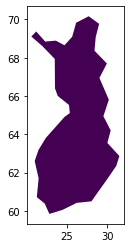

In [52]:
reut_country_geo_topic.loc[['FINLAND']].plot('count')

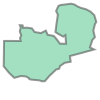

In [55]:
# This returns a Pologon object

zambia = reut_country_geo_topic.loc['ZAMBIA', 'geometry']
zambia

In [56]:
type(zambia)

shapely.geometry.polygon.Polygon

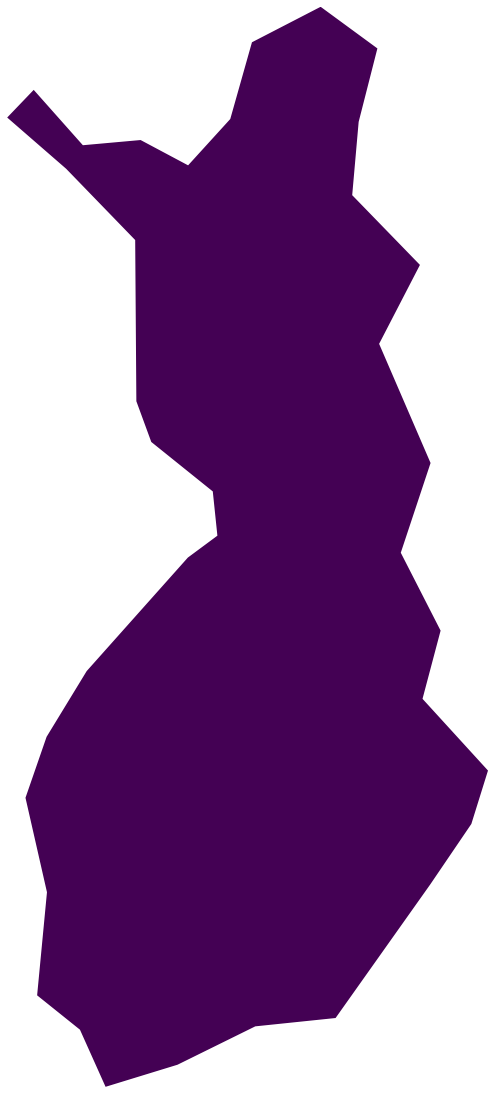

In [100]:
import matplotlib.pyplot as plt

finland = plt.figure(figsize=(15,15))
ax = finland.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.margins(0)
reut_country_geo_topic.loc[['FINLAND']].plot('count', ax=ax)
plt.savefig('pics/finland.png', bbox_inches="tight", pad_inches=0)

(-0.5, 444.5, 999.5, -0.5)

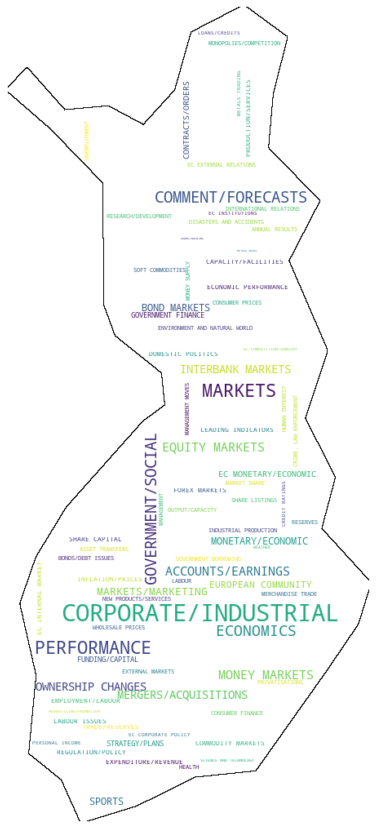

In [111]:
import numpy as np
from PIL import Image

#finland_mask =  np.array(finland)
finland_mask =  np.array(Image.open("pics/finland.png"))
finland_cloud = WordCloud(background_color="white", mask=finland_mask, contour_width=1,  width=1000, height=1000)
#finland_cloud = WordCloud(background_color="white", mask=finland_mask, width=1000, height=1000)
finland_cloud.generate_from_frequencies(finland_dict)


plt.figure(figsize=(15,15))
plt.imshow(finland_cloud, interpolation='bilinear')
plt.axis("off")



(-0.5, 863.5, 742.5, -0.5)

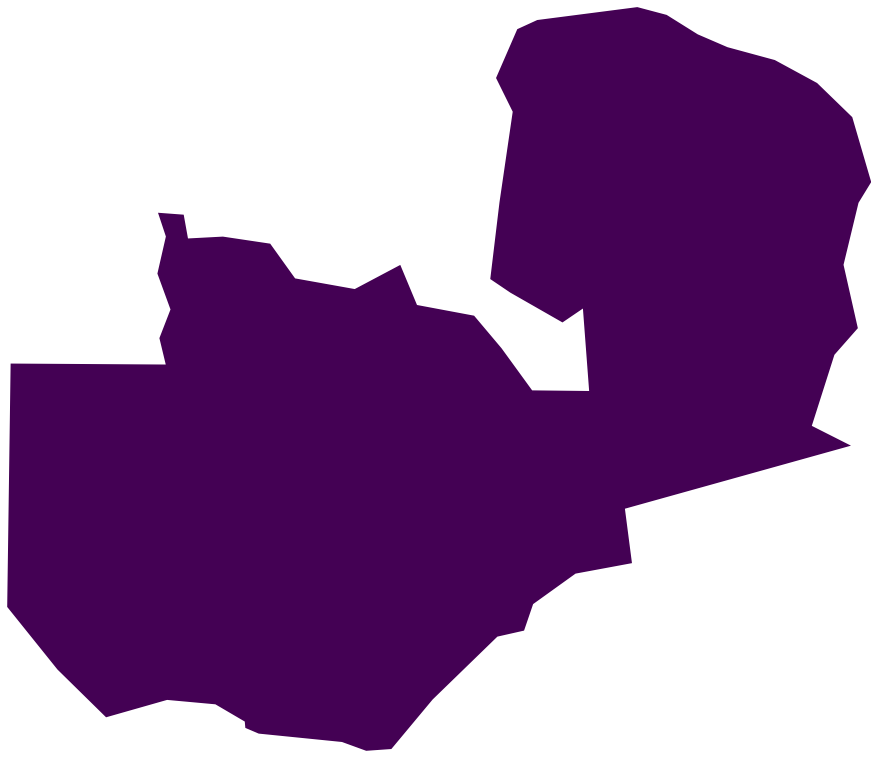

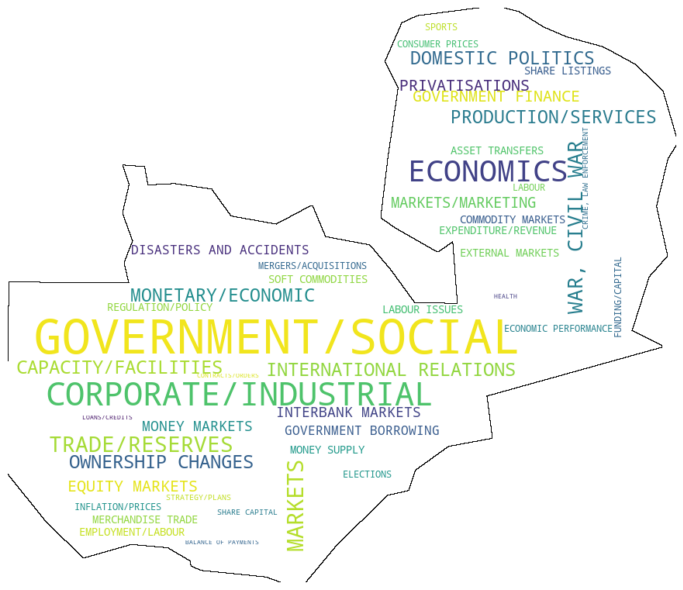

In [112]:
# Zambia
zambia_dict =  reut_country_geo_topic.loc['ZAMBIA']['topiccounts']
zambia = plt.figure(figsize=(12, 12))
ax = zambia.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.margins(0)
zambia = reut_country_geo_topic.loc[['ZAMBIA']].plot('count', ax=ax)
plt.savefig('pics/zambia.png', bbox_inches="tight", pad_inches=0)

zambia_mask =  np.array(Image.open("pics/zambia.png"))
zambia_cloud = WordCloud(background_color="white", mask=zambia_mask,  contour_width=1)
zambia_cloud.generate_from_frequencies(zambia_dict)

plt.figure(figsize=(12, 12))
plt.imshow(zambia_cloud, interpolation='bilinear')
plt.axis("off")


In [114]:
from PIL import Image

pic = Image.open(f'pics/TURKEY.png')

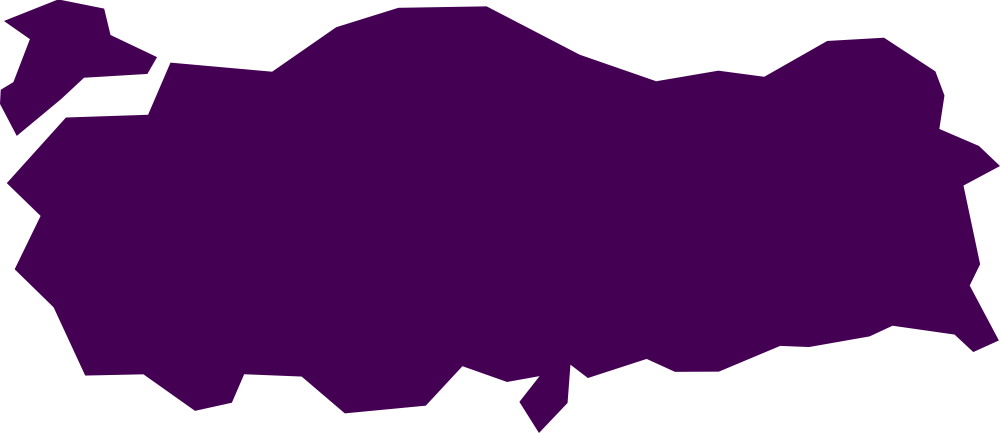

In [115]:
pic

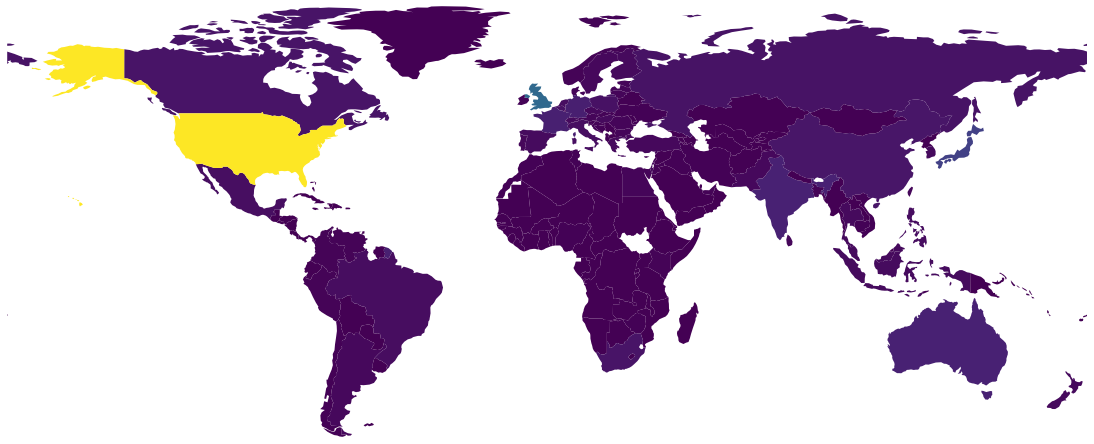

In [116]:
world = plt.figure(figsize=(15,15))
ax = world.add_axes([0, 0, 1, 1])
ax.axis('off')

ax.margins(0)
reut_country_geo_topic.plot('count', ax=ax)
plt.savefig('pics/WORLD.png', bbox_inches="tight", pad_inches=0)